In [19]:
import sys
sys.path.append('/Users/mgrecu/myPythonPackages/')
from importlib import reload
import lkTables 
import lkTables as lkT
lkTables=lkT.scattTables()
from bisectm import bisectm
fname="/Users/mgrecu/ORO/Data/wrfout_d04_2014-06-11_00:00_conv_dbz.nc"
import netCDF4 as nc
# Open the NetCDF file
ncfile = nc.Dataset(fname)


In [13]:
dbz=ncfile.variables['dbz'][:]
qrain=ncfile.variables['qrain'][:]
qgraup=ncfile.variables['qgraup'][:]
qice=ncfile.variables['qice'][:]
qsnow=ncfile.variables['qsnow'][:]
qhail=ncfile.variables['qhail'][:]
rho=ncfile.variables['rho'][:]
height=ncfile.variables['height'][:]

In [20]:
print(dir(lkT.scattTables))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'asymBB', 'asymG', 'asymR', 'asymS', 'attKaBB', 'attKaG', 'attKaR', 'attKaS', 'attKuBB', 'attKuG', 'attKuR', 'attKuS', 'dmBB', 'dmg', 'dmr', 'dms', 'fh', 'fhBB', 'graupRate', 'gwc', 'kextBB', 'kextG', 'kextR', 'kextS', 'precRateBB', 'rainRate', 'rwc', 'salbBB', 'salbG', 'salbR', 'salbS', 'snowRate', 'swc', 'zKaBB', 'zKaG', 'zKaR', 'zKaS', 'zKuBB', 'zKuG', 'zKuR', 'zKuS']


In [11]:
import numpy as np
import matplotlib.pyplot as plt
zcfad=np.zeros((50,80),np.integer)
for i,dbz1 in enumerate(dbz[:,:,4,4]):
    for k,z1 in enumerate(dbz1):
        i0=int(z1-15)
        k0=int(height[i,k]/0.25)
        if i0>=0 and i0<50 and k0>=0 and k0<80:
            zcfad[i0,k0]+=1

/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_96698/1580689348.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  zcfad=np.zeros((50,80),np.integer)


In [8]:
print(dbz.shape)

(8077, 120, 9, 9)


(0.0, 12.0)

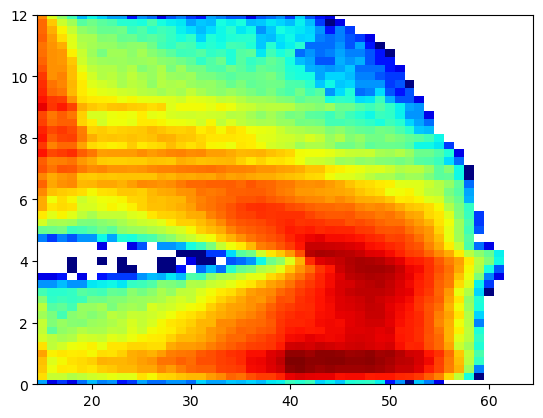

In [12]:
from matplotlib.colors import LogNorm
plt.pcolormesh(np.arange(50)+15,np.arange(80)*0.25,zcfad.T,cmap='jet',norm=LogNorm())
plt.ylim(0,12)